<a href="https://colab.research.google.com/github/HariTarz/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Import libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

### Mounting the drive and reading the dataset

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Regression Capstone Project/NYC Taxi Trip Time Prediction/dat/NYC Taxi Data.csv'
data = pd.read_csv(path)

### EXploration of dataset

In [47]:
#Viewing the data for the first time
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [49]:
data.shape

(1458644, 11)

In [50]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [51]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [52]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [53]:
data.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [54]:
df = data.copy()

In [55]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [56]:
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [57]:
# checking for longer trip (more than one day)
df[df.trip_duration > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [58]:
df.dropoff_datetime[978383] - df.pickup_datetime[978383]

Timedelta('40 days 19:31:22')

In [59]:
# df['pickup_year'] = df.pickup_datetime.dt.year
df['pickup_month'] = df.pickup_datetime.dt.month
df['pickup_weekday'] = df.pickup_datetime.dt.weekday
df['pickup_weekday_name'] = df.pickup_datetime.dt.day_name()
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [60]:
pip install haversine

In [61]:
from haversine import haversine

In [62]:
def calc_distance_km(d):
  '''This function takes longitude and latitude from a dataset and can return haversine distance in km'''
  pickup_point = (d.pickup_longitude,d.pickup_latitude)
  dropoff_point = (d.dropoff_longitude,d.dropoff_latitude)
  return haversine(pickup_point,dropoff_point)

In [63]:
# Creating a seperate cloumn for distace between the pickup and dropoff points
df['distance'] = df.apply(lambda x: calc_distance_km(x), axis = 1)

In [64]:
# Creating a column for approximate speed of the Taxi in km/h
df['speed'] = df['distance']/(df.trip_duration/3600)

In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [66]:
cate_col = ['store_and_fwd_flag']

In [67]:
encoder.fit(df[cate_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [68]:
enc_col = encoder.get_feature_names(cate_col).tolist()
enc_col

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['store_and_fwd_flag_N', 'store_and_fwd_flag_Y']

In [69]:
df[enc_col] = encoder.transform(df[cate_col])

In [70]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_weekday_name,pickup_hour,distance,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Monday,17,1.949980,15.428414,1.0,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Sunday,0,2.132181,11.577453,1.0,0.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,Tuesday,11,3.359043,5.693294,1.0,0.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Wednesday,19,0.475520,3.990375,1.0,0.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Saturday,13,0.328461,2.718301,1.0,0.0


In [71]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [72]:
numeric_col = ['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_month','pickup_weekday', 'pickup_hour','distance','speed']

In [73]:
tmp_var = ['vendor_id','passenger_count', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_month','pickup_weekday', 'pickup_hour','distance','speed']

In [116]:
df[tmp_var].describe()

,vendor_id,passenger_count,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_hour,distance,speed
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,9.944846e-01,5.515396e-03,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,3.516818e+00,3.050375e+00,1.360648e+01,2.876100e+00,1.139417e+01
std,4.987772e-01,1.314242e+00,7.406066e-02,7.406066e-02,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,1.681038e+00,1.954039e+00,6.399693e+00,4.435293e+00,1.363692e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,2.000000e+00,1.000000e+00,9.000000e+00,8.475034e-01,5.741709e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,4.000000e+00,3.000000e+00,1.400000e+01,1.531211e+00,9.586934e+00
75%,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,5.000000e+00,5.000000e+00,1.900000e+01,2.846686e+00,1.456636e+01
max,2.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,6.000000e+00,6.000000e+00,2.300000e+01,8.519696e+02,8.619142e+03


In [74]:
updated_tmp_var = [ 'pickup_month','pickup_weekday', 'pickup_hour']

In [75]:
calc_vif(df[[i for i in df.describe().columns if i in updated_tmp_var]])

,variables,VIF
0,pickup_month,3.521453
1,pickup_weekday,2.626147
2,pickup_hour,3.360165


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of trip_duration')

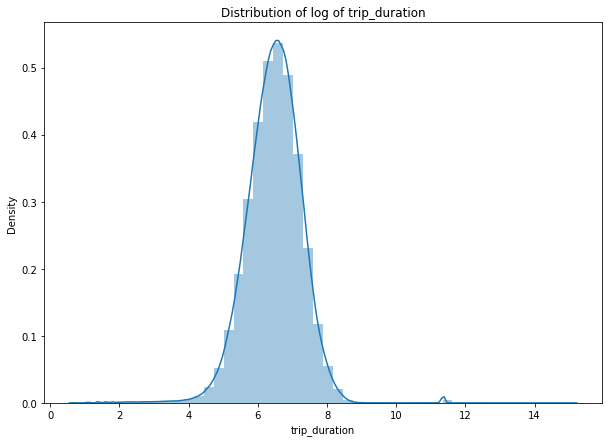

In [76]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.trip_duration.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('trip_duration')
ax.set_title('Distribution of log of trip_duration')

Text(0.5, 0, 'trip_duration')

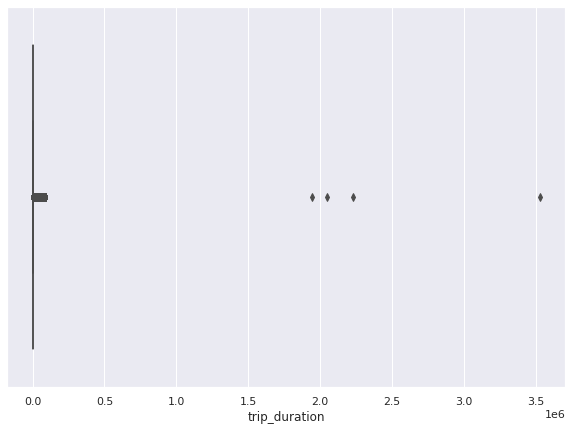

In [77]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.trip_duration)
sns.set_theme(style='darkgrid')
ax.set_xlabel('trip_duration')
# ax.set_title('Distribution of log of trip_duration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of distance')

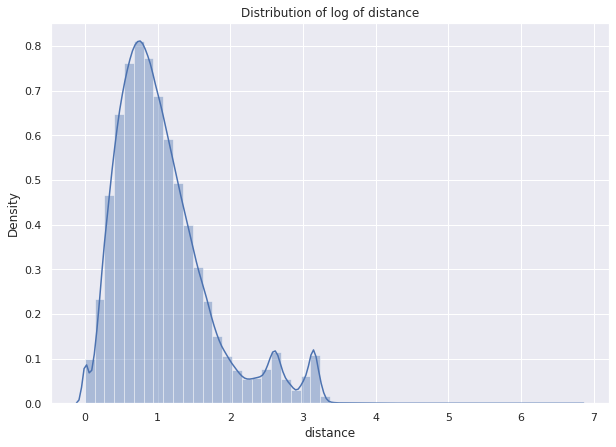

In [78]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.distance.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('Distribution of log of distance')

Text(0.5, 0, 'distance')

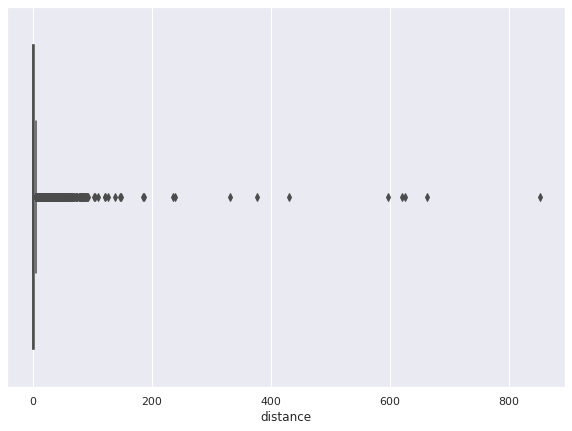

In [79]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.distance)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
# ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of speed')

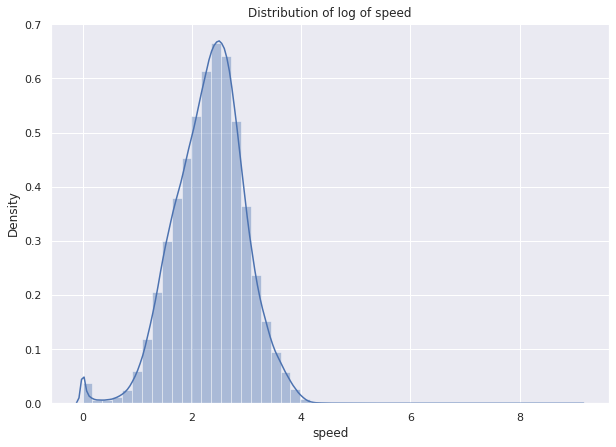

In [80]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.speed.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
ax.set_title('Distribution of log of speed')

Text(0.5, 0, 'speed')

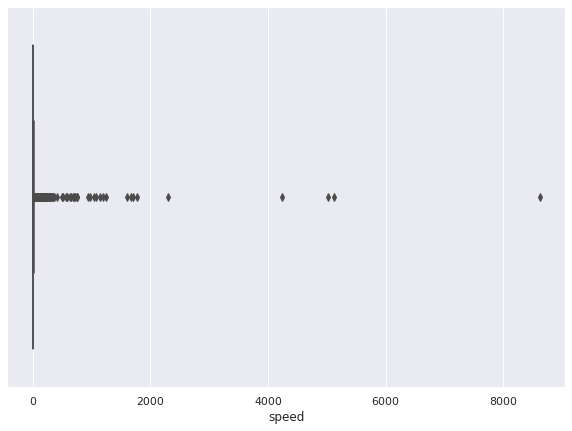

In [81]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.speed)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
# ax.set_ylabel('Frequency')

In [82]:
lim_speed_df = df[df.speed < 100]

Text(0.5, 0, 'speed')

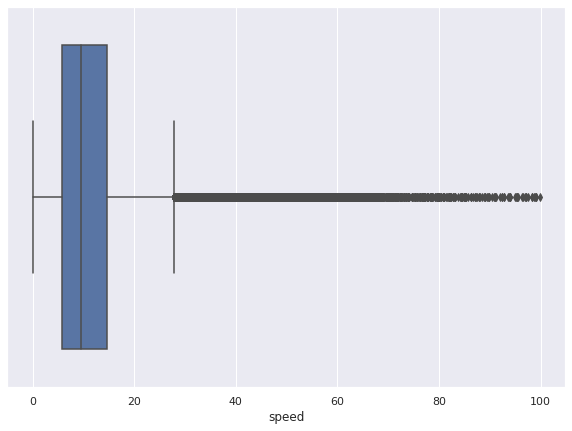

In [83]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= lim_speed_df.speed)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
# ax.set_ylabel('Frequency')

In [84]:
lim_speed_df.speed.groupby(pd.cut(lim_speed_df.speed, np.arange(0,100,10))).count()

speed
(0, 10]     760088
(10, 20]    523599
(20, 30]    117270
(30, 40]     35426
(40, 50]     12210
(50, 60]      3222
(60, 70]       541
(70, 80]       138
(80, 90]        64
Name: speed, dtype: int64

Text(0.5, 0, 'Count')

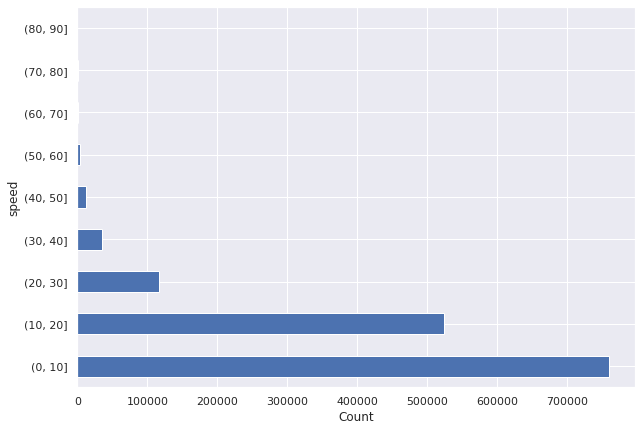

In [85]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
lim_speed_df.speed.groupby(pd.cut(lim_speed_df.speed, np.arange(0,100,10))).count().plot(kind='barh')
sns.set_theme(style='darkgrid')
ax.set_xlabel('Count')

Text(0.5, 0, 'store_and_fwd_flag')

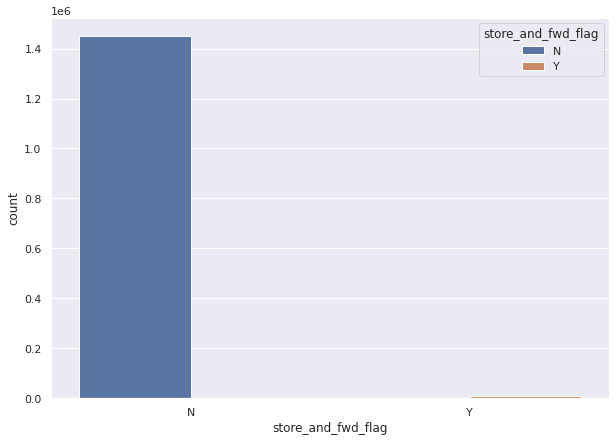

In [86]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='store_and_fwd_flag', data=df, hue='store_and_fwd_flag')
sns.set_theme(style='darkgrid')
ax.set_xlabel('store_and_fwd_flag')
# ax.set_ylabel('Frequency')

In [87]:
df.store_and_fwd_flag.value_counts(normalize=True)

N    0.994485
Y    0.005515
Name: store_and_fwd_flag, dtype: float64

Text(0.5, 0, 'pickup_hour')

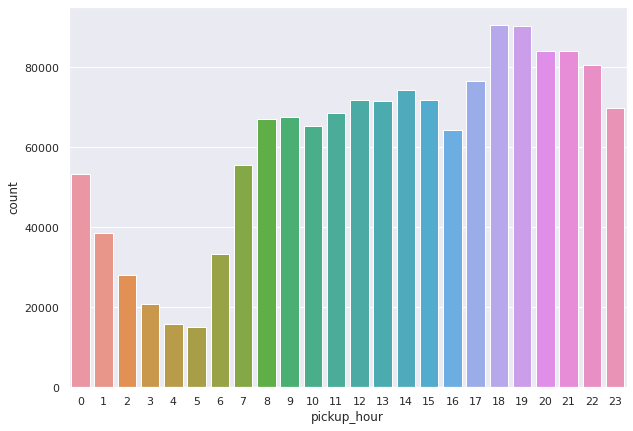

In [88]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='pickup_hour', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('pickup_hour')
# ax.set_ylabel('Frequency')

Text(0.5, 1.0, 'pickup_hour vs trip_duration for store and fwd')

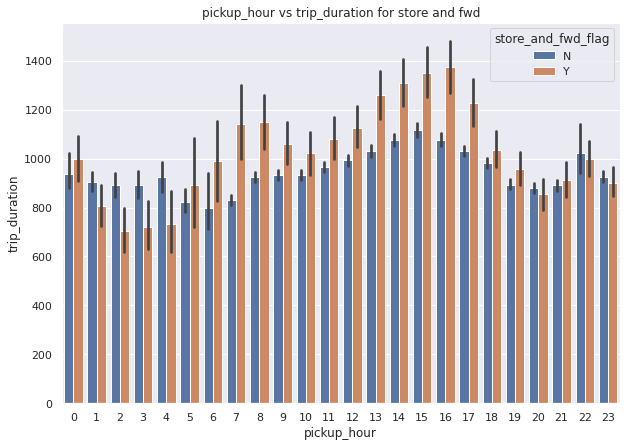

In [89]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="pickup_hour", y="trip_duration", data=df, hue="store_and_fwd_flag")
sns.set_theme(style='darkgrid')
ax.set_title('pickup_hour vs trip_duration for store and fwd')

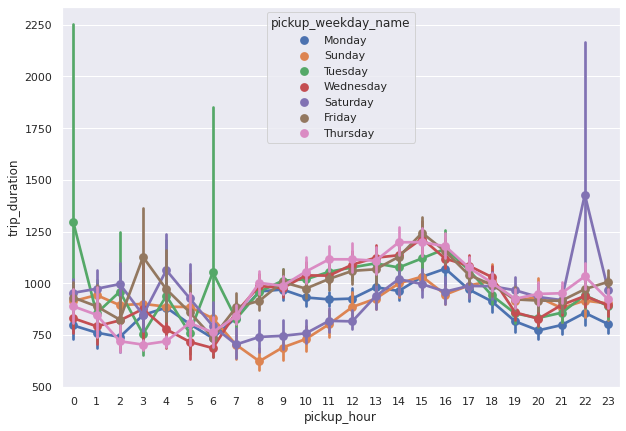

In [90]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.pointplot(x="pickup_hour", y="trip_duration", data=df, hue="pickup_weekday_name")
sns.set_theme(style='darkgrid')
# ax.set_title('Vendor_id vs trip_duration')

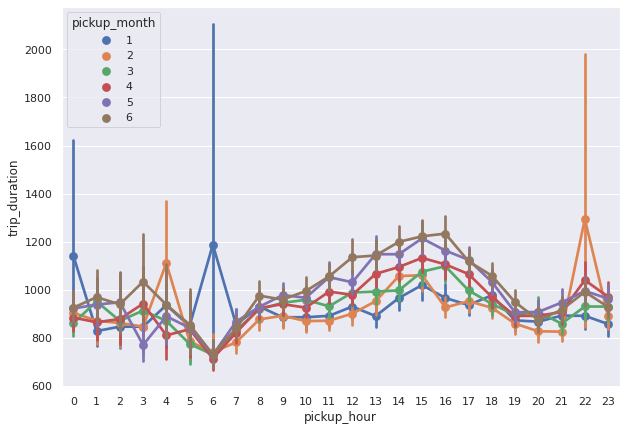

In [91]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.pointplot(x="pickup_hour", y="trip_duration", data=df, hue="pickup_month")
sns.set_theme(style='darkgrid')

Text(0.5, 1.0, 'Vendor_id vs trip_duration')

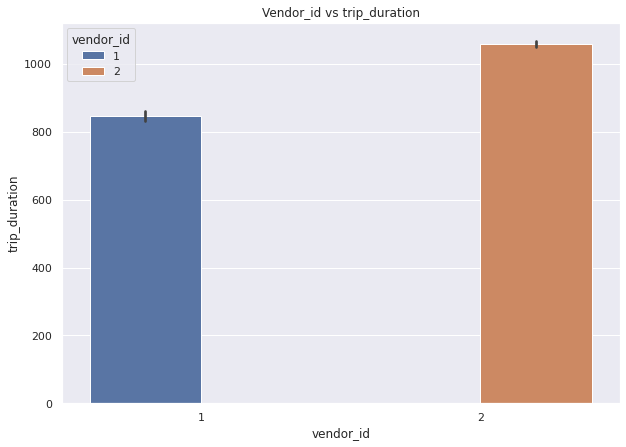

In [92]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='vendor_id', y='trip_duration', data=df, hue='vendor_id')
sns.set_theme(style='darkgrid')
ax.set_xlabel('vendor_id')
ax.set_title('Vendor_id vs trip_duration')

Text(0.5, 0, 'passenger_count')

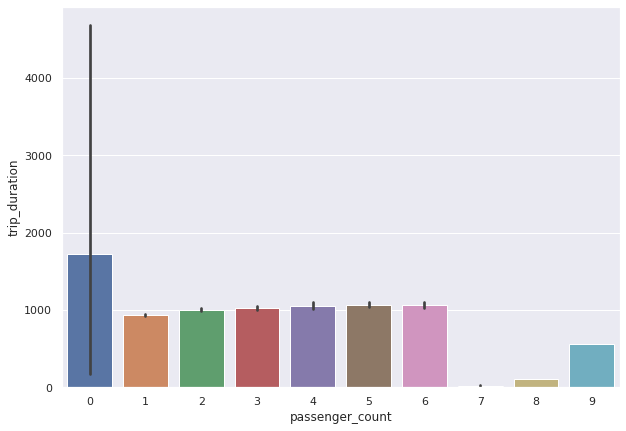

In [93]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='passenger_count', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('passenger_count')
# ax.set_ylabel('Frequency')

Text(0.5, 0, 'passenger_count')

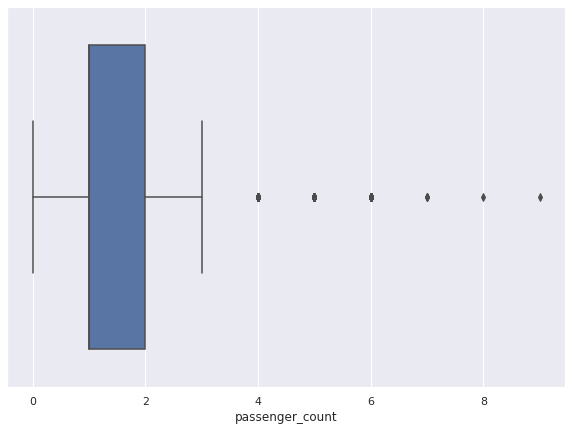

In [94]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x='passenger_count', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('passenger_count')
# ax.set_ylabel('Frequency')

Text(0.5, 0, 'pickup_weekday')

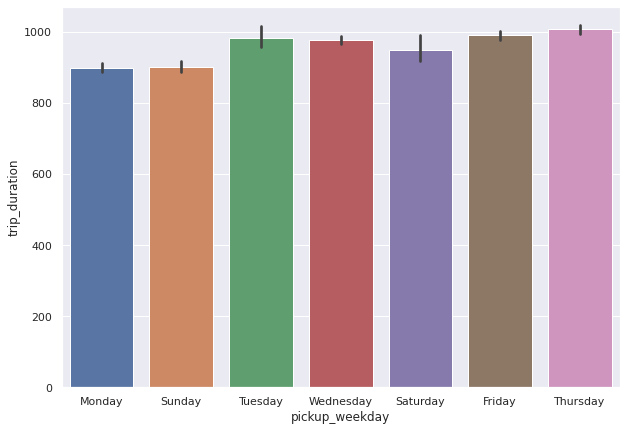

In [95]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='pickup_weekday_name', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('pickup_weekday')
# ax.set_ylabel('Frequency')

Text(0.5, 0, 'distance')

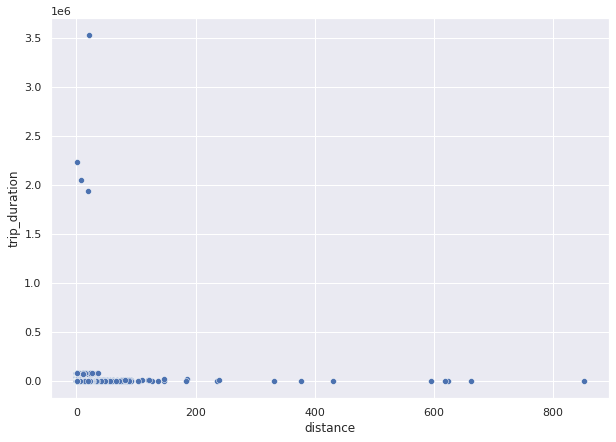

In [96]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x='distance', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')

Text(0.5, 0, 'distance')

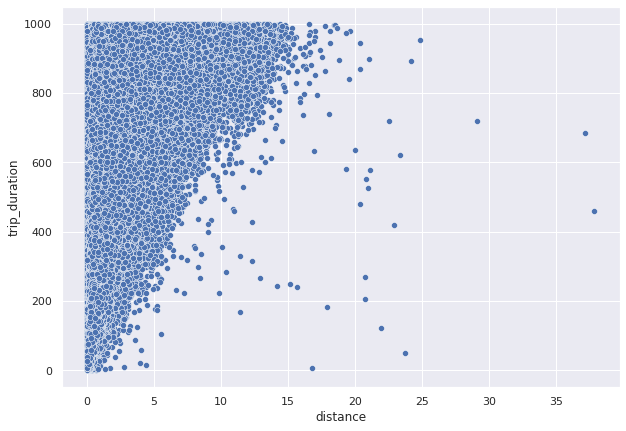

In [97]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x='distance', y='trip_duration', data=dur_dist)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')

<Figure size 720x504 with 0 Axes>

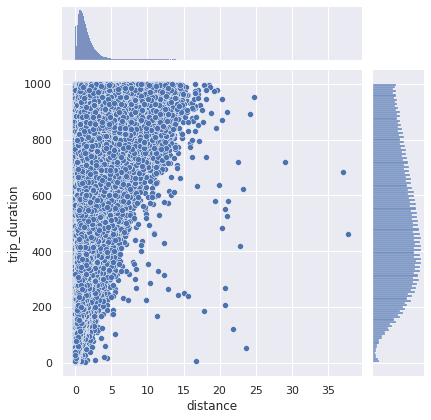

In [98]:
fig = plt.figure(figsize=(10,7))
# ax = fig.gca()
sns.jointplot(x='distance', y='trip_duration', data=dur_dist)
sns.set_theme(style='darkgrid')
# ax.set_xlabel('distance')
# ax.set_title('trip_uration VS distance')

Text(0.5, 1.0, 'log(trip_duration) VS log(distance)')

<Figure size 720x504 with 0 Axes>

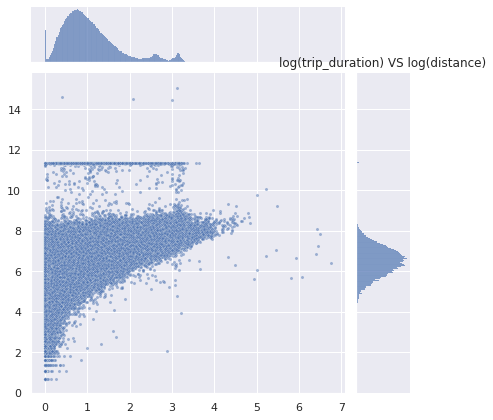

In [99]:
fig = plt.figure(figsize=(10,7))
# ax = fig.gca()
sns.jointplot(x= np.log(df.distance.values+1), y=np.log(df.trip_duration.values+1), s=10, alpha=0.5)
sns.set_theme(style='darkgrid')
plt.xlabel('distance')
plt.title('log(trip_duration) VS log(distance)')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1458644 non-null  object        
 1   vendor_id             1458644 non-null  int64         
 2   pickup_datetime       1458644 non-null  datetime64[ns]
 3   dropoff_datetime      1458644 non-null  datetime64[ns]
 4   passenger_count       1458644 non-null  int64         
 5   pickup_longitude      1458644 non-null  float64       
 6   pickup_latitude       1458644 non-null  float64       
 7   dropoff_longitude     1458644 non-null  float64       
 8   dropoff_latitude      1458644 non-null  float64       
 9   store_and_fwd_flag    1458644 non-null  object        
 10  trip_duration         1458644 non-null  int64         
 11  pickup_month          1458644 non-null  int64         
 12  pickup_weekday        1458644 non-null  in

In [101]:
cat_variables = ['vendor_id','passenger_count', 'pickup_month', 'pickup_weekday','pickup_hour']

In [102]:
tmp_df = df[cat_variables]

In [103]:
for var in cat_variables:
  tmp = pd.get_dummies(df[var], prefix=var)
  tmp.drop(tmp.columns[0], axis=1, inplace=True) #avoid dummy trap
  df = pd.concat([df,tmp], axis = 1)
# Dropping duplicate columns
# df.drop(cat_variables, axis=1, inplace = True)

In [104]:
# df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude'], axis=1, inplace = True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 63 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1458644 non-null  object        
 1   vendor_id             1458644 non-null  int64         
 2   pickup_datetime       1458644 non-null  datetime64[ns]
 3   dropoff_datetime      1458644 non-null  datetime64[ns]
 4   passenger_count       1458644 non-null  int64         
 5   pickup_longitude      1458644 non-null  float64       
 6   pickup_latitude       1458644 non-null  float64       
 7   dropoff_longitude     1458644 non-null  float64       
 8   dropoff_latitude      1458644 non-null  float64       
 9   store_and_fwd_flag    1458644 non-null  object        
 10  trip_duration         1458644 non-null  int64         
 11  pickup_month          1458644 non-null  int64         
 12  pickup_weekday        1458644 non-null  in

In [106]:
dv = ['trip_duration']
indv = ['vendor_id', 'passenger_count','pickup_month', 'store_and_fwd_flag_Y', 'pickup_weekday', 'pickup_hour', 'distance', 'speed']
print(indv)

['vendor_id', 'passenger_count', 'pickup_month', 'store_and_fwd_flag_Y', 'pickup_weekday', 'pickup_hour', 'distance', 'speed']


In [107]:
df_corr = df[indv+dv].corr()

In [108]:
print(df_corr)

                      vendor_id  passenger_count  pickup_month  \
vendor_id              1.000000         0.287415     -0.006221   
passenger_count        0.287415         1.000000     -0.002143   
pickup_month          -0.006221        -0.002143      1.000000   
store_and_fwd_flag_Y  -0.079872        -0.021815      0.000403   
pickup_weekday         0.001311         0.025191     -0.014544   
pickup_hour            0.009299         0.009101     -0.003438   
distance               0.009080         0.009988      0.014080   
speed                  0.003228        -0.000674     -0.015015   
trip_duration          0.020304         0.008471      0.006607   

                      store_and_fwd_flag_Y  pickup_weekday  pickup_hour  \
vendor_id                        -0.079872        0.001311     0.009299   
passenger_count                  -0.021815        0.025191     0.009101   
pickup_month                      0.000403       -0.014544    -0.003438   
store_and_fwd_flag_Y              1.000

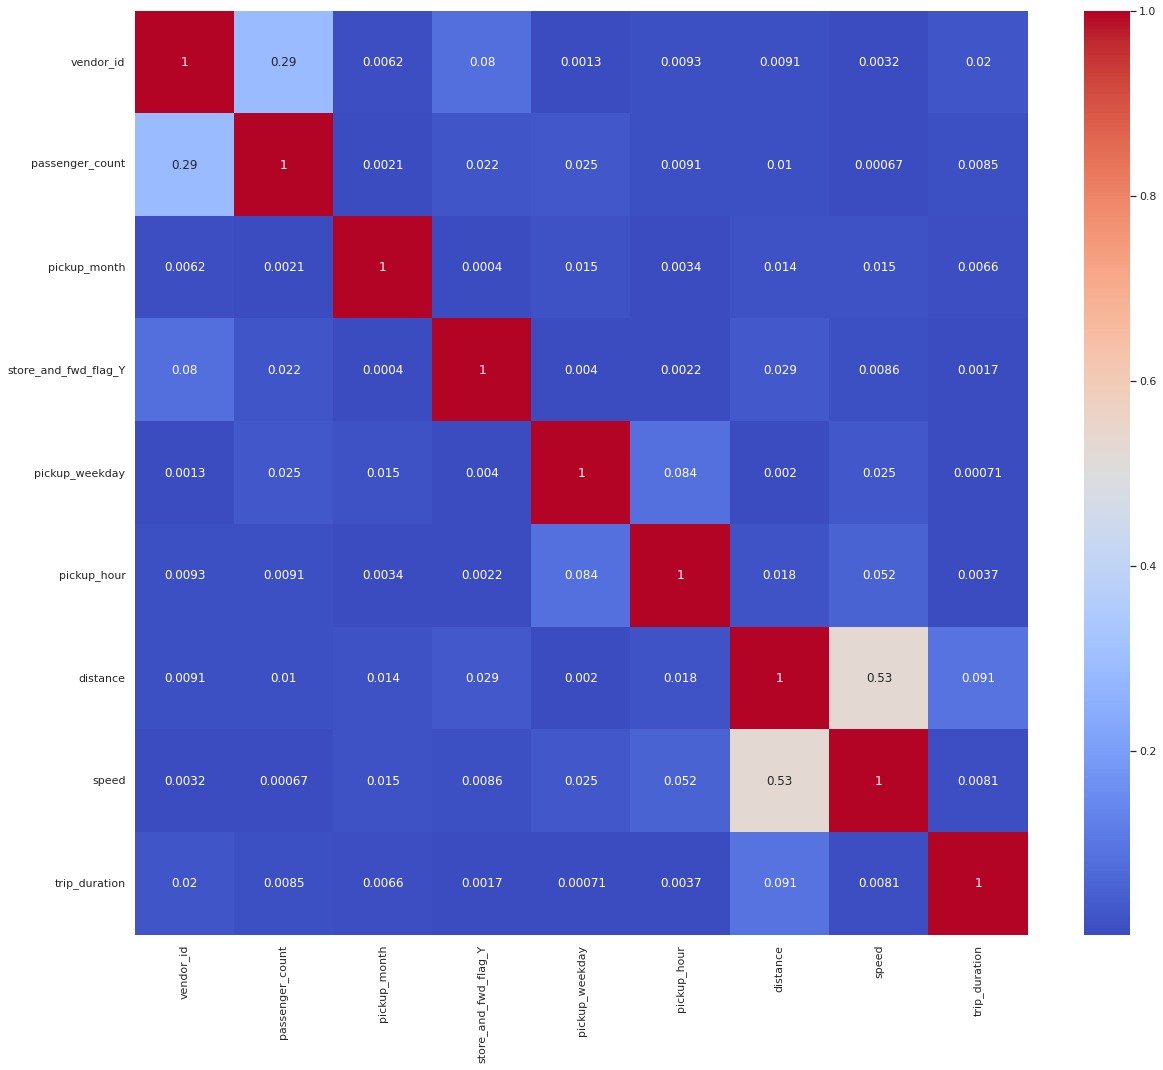

In [109]:
fig = plt.figure(figsize=(20,17))
ax = fig.gca()
sns.heatmap(abs(df_corr), annot=True, cmap='coolwarm')

In [110]:
tmp_var_corr = df[tmp_var+dv].corr()

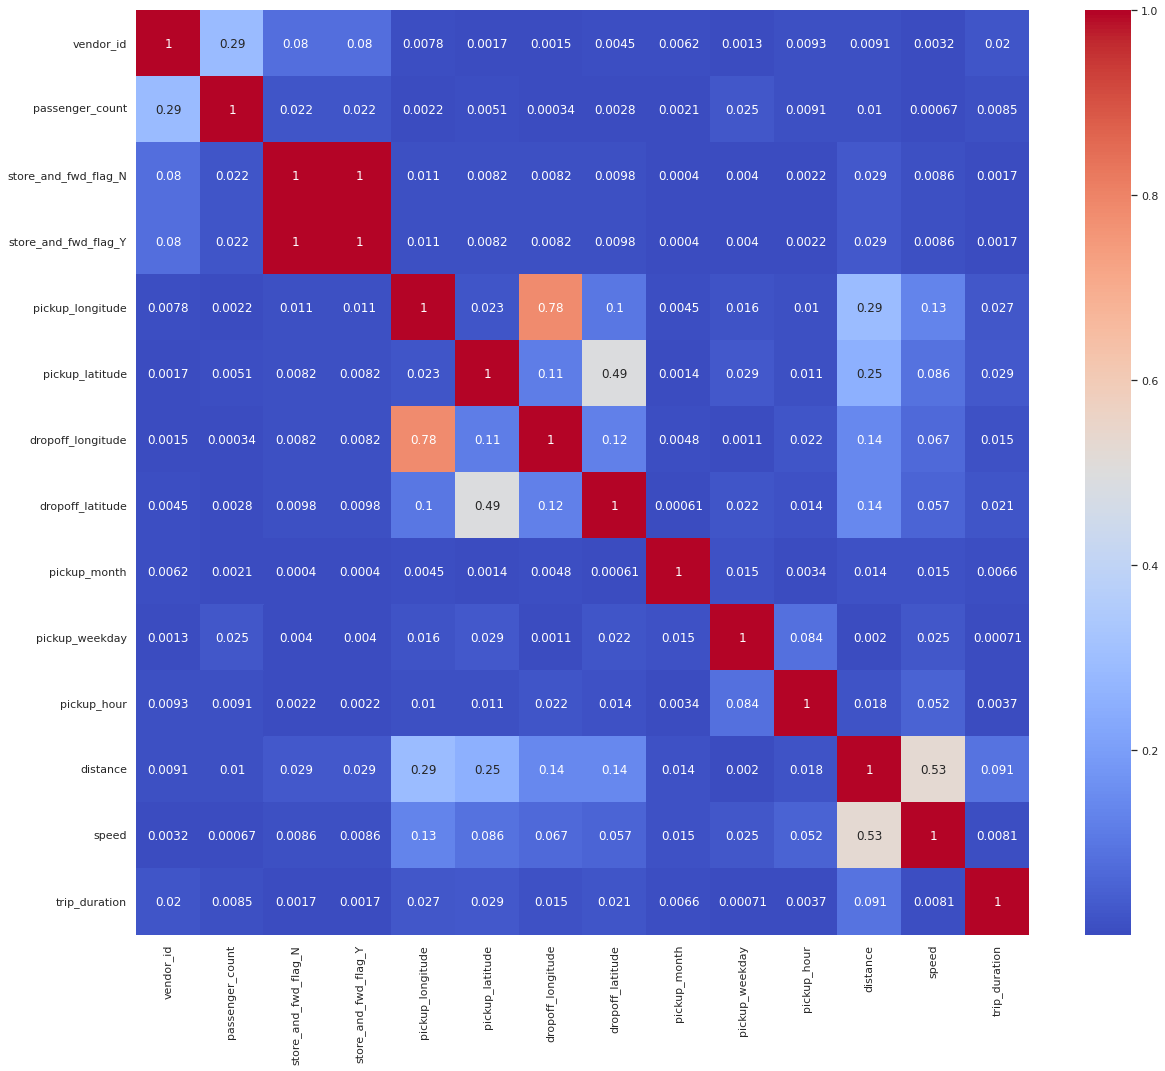

In [111]:
fig = plt.figure(figsize=(20,17))
ax = fig.gca()
sns.heatmap(abs(tmp_var_corr), annot=True, cmap='coolwarm')

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [113]:
# scaler.fit(df[numeric_col])

In [118]:
# X = scaler.fit(df[tmp_var])
# y = scaler.fit(df[dv])
X = df[tmp_var]
y = df[dv]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.5)

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lin_reg = LinearRegression()

In [159]:
lin_reg.fit(X_train,X_test)

LinearRegression()

In [160]:
lin_reg.score(X_train, y_train)

ValueError: ignored

In [162]:
y_pred = lin_reg.predict(X_test)

In [165]:
y_test[:1]

,trip_duration
1457636,692


In [164]:
y_pred[:1]

array([[ 1.53592314e+00,  1.66931263e+00,  9.94792527e-01,
         5.20747329e-03, -7.39734679e+01,  4.07507825e+01,
        -7.39734453e+01,  4.07515851e+01,  3.50432879e+00,
         3.06034585e+00,  1.35974020e+01,  2.87036785e+00,
         1.14008364e+01]])